# WELCOME TO ATTEMPT **3** of **"*THE MOST AUTISTIC THING I HAVE DONE, LIKE, EVER*"**

This is mostly attempt 2 again, **note to self, backups are not optional**.
The whole attempt 2/3 is due to v1's failings, but a bit of a recap first.

## Recap
This whole endevour is to check definitely how much time has passed in the webserial *"Wearing Power Armor to a Magic School"* written by **JCB112** (or `WPatMS` for short), the other goal is to predict in which chapter a *"communication deadline"* which happens 5 weeks after the beginning of the book.

Thanks to a **TON** of manual analysis we know that the book can't start any earier than 15:30 on the first day

## V1 Sucesses
As much as V1 was flawed from the start it did a bit of good:
1. **THE GRAPHS**, v1 gave us some very good graphs, even though they were a bit wonky in places *(the X-axis)*
2. It helped greately with the manual analysis
3. It proved that this way of parsing the timestamps can work

## V1 Problems
This is a bit easier than the above section:
1. The creation of html files and only then parsing them is a stupid idea. It would have some merit, if any changes would be made for these files, but such a thing was just not done
2. The jupyter notebook changed some variables in a cell, which did not have the definition, this made the code require a full restart on every run, as running it twice changed some variables
3. The code was not portable, the creation of the html files and the folders, required the use of some linux only commands, i want to change that by ... just not having any files saved
4. **THE GRAPHS™** all have a wonky x-axes, this is due to x being "event index" and not "chapter". This was easier, but it makes everything harder to understand

## V2 Failings
Ok this will be short. ***BACKUPS***.

So I opened a vscode server, connect to it from school (this is after *4 fucking days of coding*) **AND IT FUCKING DELETES THE WHOLE FUCKING FILE**

As to the fix, this is a git repo.

The second main failing was keeping the use of timestamps, and not just "minutes after midnight".

## V3 - Functional description

1. Parse the epub (it will be XHTML), as a list called `book` containing `chapters` that are a list of lines
2. Search for timestamps
3. Convert the timestamps to "minutes after midnight
4. Do some graphs
5. Find the amount of days that passed
6. Find the chapter, where the deadline passes

# Install of the required libraries
This code uses 2 libraries, namely [EbookLib](https://pypi.org/project/EbookLib/) and [matPlotLib](https://matplotlib.org/)

In [28]:
%%capture
# the %%capture thing makes the output supressed, on first run you might want to comment that out

# install the used libraries, thank god for FOSS
%pip install EbookLib
%pip install matplotlib

In [29]:
redditChapterText = """
 The Transgracian Academy for the Magical Arts. Grand Concourse Terminal. Local Time: 0620 Hours.

Emma

Teleportation via convoluted and magical means was not beyond me.

I’d experienced way, way more than my fair share of it in my first week of being here.

But portals? A literal bridge between two points in space? Where all it took was a simple step to bridge the gap between tens of miles, as if it was just separated by the thickness of a doorframe?

Now, that was markedly different.

Or at the very least, it felt different.

Whether it was simply because I was now face to face with a portal without the added pressure of a bomb ticking down to oblivion, or whether it was because I wasn’t still reeling from the explosive repercussions of said bomb, one fact remained the same — looking through that door was quite literally breaking both my mind and my sense of perspective.

This was amplified even further, the moment Ilunor stepped through that door, and arrived in a space that was effectively an entire cable-car ride away.

He’d just traveled miles… in a single step.

I could feel the spirits of Professor Doctor Fujikawa, Professor Doctor Khan, and Associate Professor Shaw, bearing down on me with varying levels of satisfaction, frustration, and self-congratulatory ovations in that order.

Their life’s work, having been relegated to the footnotes of the many, many, failed attempts at getting us out of Sol before the warp drive, was now being proven at least somewhat tenable here in an entirely different reality.

Whilst not exactly a wormhole… this most certainly felt as mind-breaky as one, that’s for sure.

“Ahem!” A voice from behind me finally snapped me out of my shock and reverie, as I turned around to see the apprentice. “Gawking at the fixed-point portal between the Academy and the town now, are ya?!” He cocked his head. “What?! Haven’t you ever seen the groundbreaking, reality-defining, earth-shattering wonder of instantaneous transport between two points in a physically discrete space before?!” The man paused, managing to just about close the distance between us, leaving an uncomfortable two inches of space between our personal spaces.

“I mean, I have, but, I guess this one’s just… different.” I offered.

To which the man simply let out a loud hmph, before responding. “Very well then!” He shouted, loud enough that I feared for anyone still sleeping within a hundred mile radius, before reaching into his coat and producing a letter. “Here, take this.” He pushed the letter right in front of my face, prompting me to grab it, a groan escaping my throat the moment I saw who it was from.

The Dean.

“Is that all?” I replied with a sigh.

“That is, in fact, all.” The apprentice nodded, and with a single flourish of his cape, he began strutting back over to his ticketing booth with a few stompy footfalls.

With another frustrated sigh, I began tearing into the letter, revealing a rather short one this time around, with a particularly curious instruction that felt innocuous as it did… dare I say it — magical.

In accordance with Academy regulation, given you are classified as an atypical mana-fielder, you are instructed to purchase an Mana Focus from any of the approved proprietors within the Crown Herald Town of Elaseer. Attached to this letter is a list of approved…

The benign wording, and the lack of any passive aggressive jabs (barring the whole atypical mana-fielder thing), felt like it was setting the tone for the day.

Hopefully, Thalmin’s hopes would come to fruition.

Hopefully… Today would actually be uneventful.

The fact that the dean was being civil and upfront for once, was a good of an indicator as any, right?

In any case, I eventually turned my attention back towards the door, as I resumed my stares of complete and utter disbelief at the magical wonder in front of me; more specifically, at the horizon line that was entirely off from my perspective.

With the strangely overcast night behind us, we were promptly treated to the sight of a pale blue sky, barely lit up by the sun; giving an almost whimsical feeling to the start of the day.

It was that same feeling I got when waking up extra early at the start to a long weekend. That feeling of being free to do whatever it was I wanted, and the large and seemingly endless possibilities that awaited me at the dawn of a new day.

But instead of just waiting for another episode of Forgotten Tales to drop, or diving head first (then promptly getting lost) into the seemingly endless physical library in my dad’s study, I was instead faced with the boundless and practically infinite possibilities that awaited me in Elaseer.

This was a magical town.

In a genuinely magical reality.

And sure, if I were to be cynical about it, I could say it was a college town, and a pretty gentrified one at that.

But that didn’t mean the spark of honest to god fantasy wasn’t still there somewhere.

A town was, after all, composed of people.

And if the Academy had taught me anything, it’s that even in a sea of brainwashed subjects, there were always those that didn’t conform.

So if Thacea, Thalmin, Sorecar and Chiska were anything to go by, the town could very well be my closest shot at fulfilling this ‘fantastical world’ itch.

“EVI.” I began, eliciting an affirmative beep from my virtual partner in crime. “Keep a close eye on telemetry readings, and whatever you do, don’t freak out.” I warned playfully, before going through the motions of what literally any other person would do in my shoes.

I began testing out the portal.

With a tentative, but curious motion, I pushed my ‘hand’ through the threshold.

I expected something to immediately throw me off.

Some sort of resistance, some sort of barrier, some weird surge in energy, some sort of suction pulling me through the threshold.

Instead, I felt nothing.

There was no resistance.

No barrier.

No weird eruption of energy or anything to indicate anything was amiss.

Not even a weird ‘suction’ to push me through the threshold.

Nothing, but a heavy dose of mana radiation that increased in intensity at the threshold of the portal, presumably there just to sustain it.

I stood there, my body firmly stood within the Academy, and my ‘hand’ inches in front of me… miles away in town.

A familiar feeling I thought I’d be experiencing more of on this mission quickly manifested — the feeling of complete and utter befuddlement, disorientation, and outright disbelief.

I was seeing what was only possible in VR, manifesting in real life.

And it was just so jarring.

“Ugh! Enough with the childish theatrics, earthrealmer!” I heard a voice from across the doorway, Ilunor’s voice, coming through.

What happened next however just put my brain into a further spiral, as he casually walked through the portal once more, from the town, and back into the Academy; where he promptly placed himself behind one of my shins and started pushing.

The act itself was comical, if not downright aggravating, depending on my mood.

However, given the context of how this was even allowed to happen… it didn’t really bother me. Moreover, it simply pushed me to investigate the portal further.

Ignoring the Vunerian, and focusing entirely on the doorway in front of me, I finally moved forward, taking a single, solid stride and reaching the other side in the same way my ‘hand’ did — without any fanfare whatsoever.

“I assume you lack such forms of instantaneous transportation in your realm, Emma.” Thacea surmised.

However, instead of responding, I simply moved back towards the portal, now utterly obsessed over it.

I did what anyone would do, be they a child or adult, gamer or scientist…

Indeed, I channeled the sum total of human curiosity to satiate that one burning question.

What would happen if you stood in the middle of the portal? What would your eyes see when you were wedged halfway between two spaces?

I just had to find out.

So with another swift motion, I once again stepped through the portal. However this time, I stopped half way, standing sideways in the door, with one foot in the Academy and the other in Elaseer. This way, both of my eyes now stared out at two different locations, miles apart.

But again, just like the ‘hand’ experiment, nothing disastrous happened.

Instead, I experienced more or less the same thing you’d experience in a typical VR session if you attempted the same stunt.

I simply saw the Academy’s concourse in one eye, and Elaseer’s in the other.

If anything, because of how similar the terminals’ designs were, this proved to be less disorientating than I expected.

In fact, if I didn’t realize this doorway was a portal, it’d be difficult to tell I was in two places at once.

The thought of the portal slicing me in half through an unexpected deactivation made me anxiously jump to the other side however, as I was soon confronted with the gang who stared at me with varying degrees of perplexity.

“You know, they designed the concourse in such a way, with virtually identical designs, such that a person wouldn’t lose their sanity if they pulled off the stunt you just did.” Thalmin announced firmly, garnering a cock of my head.

“Really?”

“No, not really.” He responded with a mischievous chuckle, his features contorting to one of absolute slyness that I could only respond to with a puff of my cheeks… not that anyone was able to see it. “But it’s fun to imagine that to be the case, regardless!”

“In any case, given everything you’ve experienced thus far, I’d assume you’ve had enough of portals for the rest of the school year, earthrealmer.” Ilunor butted in with a frustrated groan.

“I mean, to an extent, yeah. However, those experiences were more or less ‘heat of the moment’ type situations. In total, I think I’ve had what… three encounters with portals overall? This is the first time I actually get to mess around with a portal, and it’s just so… jarring.” I explained, garnering only a quirk of Ilunor’s brow, but more so just a face full of tired frustration.

“You newrealmers are so easily amused by the slightest of modern conveniences.” He shot back, as he began walking out of the concourse, followed by a growling Thalmin, and eventually by myself and Thacea.

We eventually made our way through the mirrored concourse, towards the open-air entrance, where I was finally able to lay my eyes upon an entirely new world.

A world that I’d only briefly glimpsed during a dark and action-filled night.

But one that now showed its true colors, bathed in sunlight, rather than by the occasional streetlamp.

The first thing that hit me was the brightness of it all, as even in the drowsy shades of dawn, the buildings themselves seemed to glow with a warm and welcoming aura. The architecture on display here was nothing short of artisanal in terms of aesthetic, but uniform in their theming.

They resembled something out of the renaissance, with townhouses and free-standing structures lining the wide avenue-like streets. However, what they prided themselves in intricate design, they seemed to lack in color and paintwork, as cleanliness didn’t seem to end with the spotlessness of the streets and facades, but seemed to go so far as to suck the life out of the buildings — leaving only white and varying shades of cream and black to act as accenting and contrast.

But in a story as old as time, wherever there was an arbitrary deficit in expression, there was bound to be some sort of an outlet to make up for it. Which, in the case of Elaseer, seemed to come in the form of the outrageously ornate architecture of the buildings themselves. Block upon block of storefront and apartment alike were decorated in all manner of facades, ranging from ornate carvings, to terraced exteriors, to even full-blown statues and ornaments of varying size and shapes. Nothing seemed to be off-limits here, as it looked as if the architects had just raided an antique store for all of its knick-knacks for use in their designs.

The second thing to really slam me in the face was the sheer openness and liveliness of the streets themselves.

As unlike the repetitive and same-y life within the academy walls, there seemed to be more variety, more color when it came to passersby and traffic alike. With the sound of quiet conversation and occasional chatter generating this buzzing sensation within my very soul.

Whilst small town life was one I yearned for, I never knew what I missed when I left Acela for the relative sterility of the IAS’ facility, let alone the quiet emptiness that was the Academy.

And while Elaseer was no Acela, let alone this early in the morning, it was still a welcome departure from the predatory school life that was the Academy.

Elves dominated what few pedestrians there were at this hour, with most dressed rather modestly, lacking in ornamentation and gaudy aesthetics that the rest of the non-uniformed student body seemed to be so fond of. And judging by their neutral expressions, and a look of deference upon making eye contact with Ilunor, and to a lesser extent, Thacea and Thalmin, it soon became clear who most of these people were.

Class differences aside, many of them seemed to actually wear a genuine smile on their faces, making for a stark difference from the more calculated interactions back in the Academy. Though strangely, when attempting to isolate and translate their idle chatter, the EVI seemed to come up with a statistically significant wider margin of error; far more than what was observed up too this point.

I was so preoccupied by both the charm of my surroundings and the EVI’s technical hiccups, that I’d almost zoned out Thacea’s list-reading, as she went down the list of places we had to hit either before or after the adventuring hall meeting, depending on what shops decided to open.

“Stationeries.” She began, as she went down the list of precisely what we needed. “Notebooks, quills, pens, and all manner of instruments.”

“Got it.” I nodded, my mind wandering some more as I just couldn’t stop looking at everything around me.

The streets themselves were buzzing with vehicular activity, with nary a horse-drawn carriage to be seen, replaced instead by the same sorts of horseless carriages similar to Lartia’s own stretch-carriage. Though fancy and relatively common, it seems as if the horseless carriages were mostly relegated for passenger-use, leaving the few utility and cargo-carrying carts I could see to remain mostly horse-drawn. This divide was further reflected in the many alleyways seemingly carved into this picturesque, dynamic world of solid white buildings, as cart upon cart hugged the ‘service channels’ of the avenue, before veering off into an alleyway as quickly as they found one.

“Alchemized and magic-resistant glassware.” Thacea continued, eliciting another nod from me.

“Gotcha.” I responded.

“Though tantalizing, I do urge everyone to resist the temptations of the merchants, as they will do everything in their power to upsell you on superfluous additions on each and every purchase.” Thalmin quickly chimed in.

“Engraved glassware, engraved stationeries, engraved notebooks,. Yes yes yes, these merchants all know one trick in the book, and that’s to play the role of the would-be novice engraver — scrawling down family crests and surnames into each and every item you decide to purchase.” Ilunor responded with a tacit sigh. “Very poorly too, if that must be said.” He quickly added.

“Huh… so this really is a college town, complete with gimmicks and cringy up-selling tactics.” I offered out absentmindedly, my eyes still transfixed on each and every detail in front of me, as I soaked in the ambiance some more, especially as the sleepy dawn quickly started giving way to all-out morning.

“School uniforms for those that haven’t yet had one tailored—” Thacea paused, taking a moment to purposefully eye each and every one of us. “—of which it seems as if only one among us has had the foresight to prepare for.”

My brow quickly perked up at this rare instance of cattiness from the avinor princess.

“Your kind are quick to show your deference for the Nexus, Princess Dilani, and I very much appreciate that.” Ilunor responded with a series of exaggerated nods. “In any case, I will actively mourn the loss of my daily dress. Oh, the sacrifices I make for academia.” He spoke in an almost flighty tone of voice, as his personality seemed to shift towards this more outwardly eccentric one the more and more we encountered members of the general public.

Many of whom I noticed paying increasing attention to us, their eyes fixated on me in a mix of curiosity and apprehension.

That much was to be expected.

Though what wasn’t expected was how about half of their attentions seemed to be focused on the Vunerian, as it seemed as if every other person we passed took their time to regard the small blue thing either with a dip of their head, or an all out bow provided they weren’t busy with anything on hand.

These public displays of deference seemed to fuel the Vunerian’s gait, as confidence slowly but surely started to return. What damage the Academy life had inflicted on him so far seemed to just melt away with each and every passing show of respect.

This all culminated in the ultimate show of courtesy and reverence for the Vunerian as we arrived at our first destination and the reason we even bothered to wake up this early for in the first place — the bakery.

In fact, we didn’t even have to step into the establishment for this display of respect to begin.

“Ah! My lord! Please, allow me!” What I’d first assumed to be another customer given his fancy attire, but quickly turned out to be the doorman, spoke.

A bakery… with a literal porter out in front… Now I’ve seen everything. I thought to myself.

Ilunor’s reaction to this was nothing less than complete and utter satisfaction, as that smug signature grin returned in full.

No further words were exchanged as he waltzed through that door, and into what I could only describe as a bakery that even Marie Antoinette would be impressed by.

Color, vibrancy, and noisy design practically flash-banged me, as it felt as if all of the lost vibrancy of the outside world had instead been bottled up and hidden away in this one room. The wallpaper and embellishments of the place screamed Versailles, but the glass display cases and gravity-defying rotating shelves of pastries was enough to remind me of exactly where I was.

Pastries of all varieties sat proudly behind each display case, their freshness visible from the fogginess of the glass, and the literal magical glistening of some of the more fancy treats. Golden brown, flaky, crunchy delights teased me as I became even more palpably aware of the two senses permanently denied to me in this realm. Coincidentally, the two that were arguably the most important in place like this — taste and smell. The former, I could barely deal with. But the latter? Well… that was abject torture right about now.

“Ah! My lord! It is an honor to have you as our first customer!” A voice boomed from behind the seemingly unending rows of busy bakers running to and fro the massive furnaces and the display cases out in front. “Welcome to Byron’s Best Baked Goods! It is not often that we are visited by a member of the Nexian nobility. So please, excuse me for my tardiness and lack of tact, my lord.” The proprietor in question, an elf clad in what I could only describe as a cross between a chef’s jacket and a nobleman’s coat, arrived on scene; pushing past the counter, before dipping his head with a deep bow. “How may I be of service, my lord?”

“Your finest baked goods, one of each, to be delivered to the Adventurer’s Guild at my summoning.” Ilunor stated tersely, without even looking the man in the eye.

“Of course, my lord. Your will be done.” He bowed deeply, before scurrying back behind the counter, and scribbling something on a parchment.

“And will my lord wish to open an account with this establishment, or—”

Ilunor responded to this question by simply reaching for his sack of coins, and slamming it hard on the counter, despite having to reach up high to do so.

“I haven’t the time to dilly-dally, nor the patience to deal with petty debt, so let us settle this now.” He spoke assertively, prompting the man to quickly tear off the slip of paper he was scrawling upon, before handing it to Ilunor.

Peeking over the Vunerian’s shoulder, the list I saw was… nothing short of excessive.

But he did say one of everything, after all…

A quick nod, and a signature of his own, marked what I assumed to be an acknowledgement of the transaction.

After which, a surge of mana radiation was noted, preceding what I could only describe as an animation pulled straight out of a videogame — as gold, silver, and copper coins flowed up from Ilunor’s pouch and into the elf’s own pouch.

Following this, the man handed Ilunor a small stone carved with runes. “Simply activate the stone, and we will rush to the adventurer’s guild post-haste, my lord.” He bowed once more, prompting Ilunor’s wordless departure from that bit of social interaction, as he left without so much as a ‘thank you’.

The moment we returned to the streets, however, was the moment that the culture shock of just being out here in town started to wear off. Or at least, enough that I could start addressing a few things.

“Right. So. Ignoring Ilunor’s rather abrasive interactions just now—” I spoke off-handedly, eliciting barely a huff from the Vunerian as he simply took in the sights, sounds, and most of all — the ‘respect’ being shown by every other passerby. “—I do have another item we need to add to the shopping list, Thacea.”

I quickly reached for the letter, before handing it off to the avinor.

A quick speed read later, and the princess soon gave me an answer as to exactly what the dean was asking for.

“I see the dean wishes to fulfill a formality.” Thacea began with a chirp. “A mana focus will do nothing for you, Emma. Given you lack a manafield, and the ability to use mana, this will merely be a paperweight for you to carry.”

“So… what exactly is it? The way it was phrased, it seems to be a tool for people with atypical manafields. I’m assuming it's like, some sort of a tool to help you augment a manafield?”

“That is correct, Emma.” Thacea nodded. “A mana focus is little more than an enchanted item, typically crafted in the form of a wand, through which a mage may focus their magical energies through — in the event that one’s own manafield is too unstable or has improperly matured. It is rare that a noble mage must resort to the use of a wand. Typically, it is seen only as a learning tool, or a crutch of sorts for children still developing their manafields.”

“Typically seen in children of nobility younger than twelve years of age, and not a year more. Extended use of it seems to paradoxically hamper manafield maturation, so twelve years is the cut-off point for most mages. Though there are a few who unfortunately become reliant on it, thus limiting their ability to use wandless magic.” Thalmin quickly added.

“And any mage who uses a wand as a crutch, is quite unfortunate indeed. As a wand, as with any enchanted item, will become worn out in time. This leaves oneself vulnerable to any second-rate wandless mage worth their money.” Ilunor surmised, as this topic opened an entirely new fascinating subject for me to chew on. “This is not even taking into account becoming disarmed in a fight. To be quite honest, a mage with a wand is just as pathetic as a guardsman with an enchanted weapon. Yes, the former may be capable of practicing magic as any other mage, but they are likewise left as powerless as a commoner if they do lose their wand; relegating them to becoming as ineffective as the latter.”

“Wait, so, can’t a commoner just you know… use a wand to enhance their manafield?” I questioned.

“It is clear we are yet again at another impasse with your ability to parse basic magic theory, Emma.” Ilunor hissed out. “It’s in the name, it’s a mana-focus. All it does is to aid in the focusing of one’s existing manafields. If a commoner were to use it, nothing would happen. If you were to use it, nothing would happen. Unlike an enchanted weapon, which still requires training mind you, wands aren’t enchanted to release a predetermined enchantment of mana using a commoner’s weak manafield. It’s instead, simply allowing a mage to focus their pre-existing strong, but atypical manafields.”

“I see.” I nodded, still processing this intel. “So… I’m assuming since the dean can’t file me in as ‘manaless’, that because of some archaic rule, that I’m now effectively forced to buy one simply because of my supposed ‘atypical manafield’?”

“That’s precisely it, Emma.” Thacea nodded, just as we rounded the corner and arrived at what appeared to be the town square.

A fountain dominated the central space, one that shot up impressively high, forming what appeared to be all sorts of shapes, symbols, and even entire words and letters, acting as a sort of weird cross between a New Vegas water show, and a public announcement board.

“Right, so, wands aren’t too expensive now, are they? I mean, I just want to be wary of my budget, after all.”

“A typical wand ranges anywhere from a few hundred gold coins, up to tens of thousands if you wish for a tailor-made one.” Ilunor responded.

“I’ll go for the cheapest one, thanks. It’s not like I’ll need it anyways.” I shrugged, before continuing on the path Thacea seemed to have already charted out for us.

We quickly moved through one of the many branching pathways from the central, circular plaza, arriving at a street with row upon row of particularly large and prominent buildings, with each lot taking up at least ten or so townhouses’ worth of storefronts alone. Context clues were enough to clue me in to exactly what these structures were. Especially the one with statues of knights in armor lining the tall steps, leading up to an oak door engraved with images of dragons, wyverns, and all sorts of beasts being slain by said knights.

“It doesn’t look open to me.” I offered, gesturing at the guild hall.

“It’s open alright. They just don’t openly advertise that they are.” Thalmin responded, as he ascended those steps first, rising about five feet before we reached the large doors of the guild hall; knocking hard on them using the provided door-knockers.

“Shall I order my bread-man to come now, or—”

“After we enter, Ilunor.” Thacea interjected, though it was already far too late if the ringing of his stone was of any indication.

“Ah.” He spoke, garnering a sigh from Thacea, as the stone quickly transformed into a mini-gargoyle and flew off. “The bread-man will be here shortly, so let us make our business quick.”

The doors quickly opened following that exchange, as a tall, large, and imposing figure dominated the space; his face obscured beneath a heavy cloak.

“Ah, welcome my lord.” The man spoke with an imposing cadence. “It is not often we have pupils at the academy visiting our establishment this early in the school year. Is there a quest you would like to request from the guild? If so, you are free to contact us through Professor Chiska or—”

“This is not a typical quest, I’m afraid.” Thalmin took the reins of the conversation, reaching for the door, and keeping it open.

“Oh? Pray tell, what sort of atypical request do you have in mind, my lord?”

“One which requires an immediate audience with your guild master.” The wolf prince stated in no uncertain terms, a low grumbling emanating from deep within his chest.

A moment of silence followed that demand, as the hooded figure looked off to his side, before nodding once.

“And an audience you shall gain… mercenary prince.”

The door swung open for us at that point, as the man gestured for us to enter…

But not before the mismatched footfalls of about ten people emerged from behind us. “My lord! Your delivery from Byron’s Best Baked Goods has arrived!”

This prompted the doorman to turn his attention towards Thalmin, cocking his head in the process. “... are they with you, my lord?”

To which Thalmin could only sigh in response, giving a stern look to Ilunor, before turning back towards the door man with a confident look. “A gesture of our good faith, and Havenbrockian hospitality, my fellow.” 

"""

## Epub extraction
This cell extracts the `WPAtaMS.epub` file.

The code is a modified version of the example from [here](http://docs.sourcefabric.org/projects/ebooklib/en/latest/tutorial.html#reading-epub).

But `chapter.get_body_content()` gives a bytestring, so we change that to a utf-8 encoded string, and then split to lines

In [30]:
import ebooklib
from ebooklib import epub

bookFile = epub.read_epub("./WPAtaMS.epub")

book = []

for chapter in bookFile.get_items_of_type(ebooklib.ITEM_DOCUMENT):
    byteChapter = chapter.get_body_content()
    strChapter = str(byteChapter,'UTF-8')
    book.append(strChapter.split('\n'))

#chapter 0 and the last one are the ToC and the cover image respecly, let's detete them
book.pop(0)
book.pop(-1)

# The book starts at 1530 but that chapter does not have a timestamp, so we are going to add it
book[0].append("This is manually added TIME: 1530")

book.append(redditChapterText.split('\n'))

book[0][:5]

/home/rim/Desktop/WPAtaMS-Analyzer/.venv/lib/python3.10/site-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')
/home/rim/Desktop/WPAtaMS-Analyzer/.venv/lib/python3.10/site-packages/ebooklib/epub.py:1423: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to './/xmlns:rootfile[@media-type]'
  for root_file in tree.findall('//xmlns:rootfile[@media-type]', namespaces={'xmlns': NAMESPACES['CONTAINERNS']}):


['',
 '  <h1>Chapter 1: Second Contact</h1>',
 '  <div class="chapter-inner chapter-content">',
 '                <p class=""><span style="font-weight: 400">There was a lot of fanfare that surrounded the first human to have made it to the Academy. Though it wasn’t because they were particularly well liked, or studious. Nor was it because they were in some way infamous or unsavory. In fact, they simply hadn’t had enough time to make an impact either way, as they’d emerged through the portal dead on arrival.</span></p>',
 '<p class=""><span style="font-weight: 400">It was a known fact that humans were just inherently magically-deficient. Their race was the last of the adjacent realms to have even detected the </span><em><span style="font-weight: 400">existence</span></em><span style="font-weight: 400"> of magic after all, let alone learning of the Nexus’ existence. What wasn’t expected however was just how truly deficient they actually </span><em><span style="font-weight: 400">were</span

## Parsing
To parse we first need to search for the timestamp, it is always given in either `hhmm` or `hh:mm` format. But always (excluding one time), the timestamp is preceeded at some point by the word `time`, in the same line, we will search for both.

The timestamp seach will be done using a regex, namely this one
```regex
   /([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]/
```

In [31]:
import re

def toMinutes(timestamp)->int:
    hours = int(timestamp[:2])
    minutes = int(timestamp[2:])
    return (60*hours)+minutes


timestamps = [] # this is an array of timestamps in the "minutes after midnight" format

for chapter in book:
    chTimestamps = []
    for line in chapter:
        if re.search(r'([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]',line) is not None:
            if line.upper().find("TIME:") != -1 or line.upper().find("HOURS") != -1:
                timestamp = re.search(r'([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]',line)
                timestamp = timestamp.group().replace(':','')
                chTimestamps.append(toMinutes(timestamp))
    timestamps.append(chTimestamps)

timestamps[:5]

[[930], [], [], [], []]

## Plotting
We are back at the plots, *yay, it is not that i lost a week of work to  get back here* ... But now we use `minutesAfterMidnight` directly

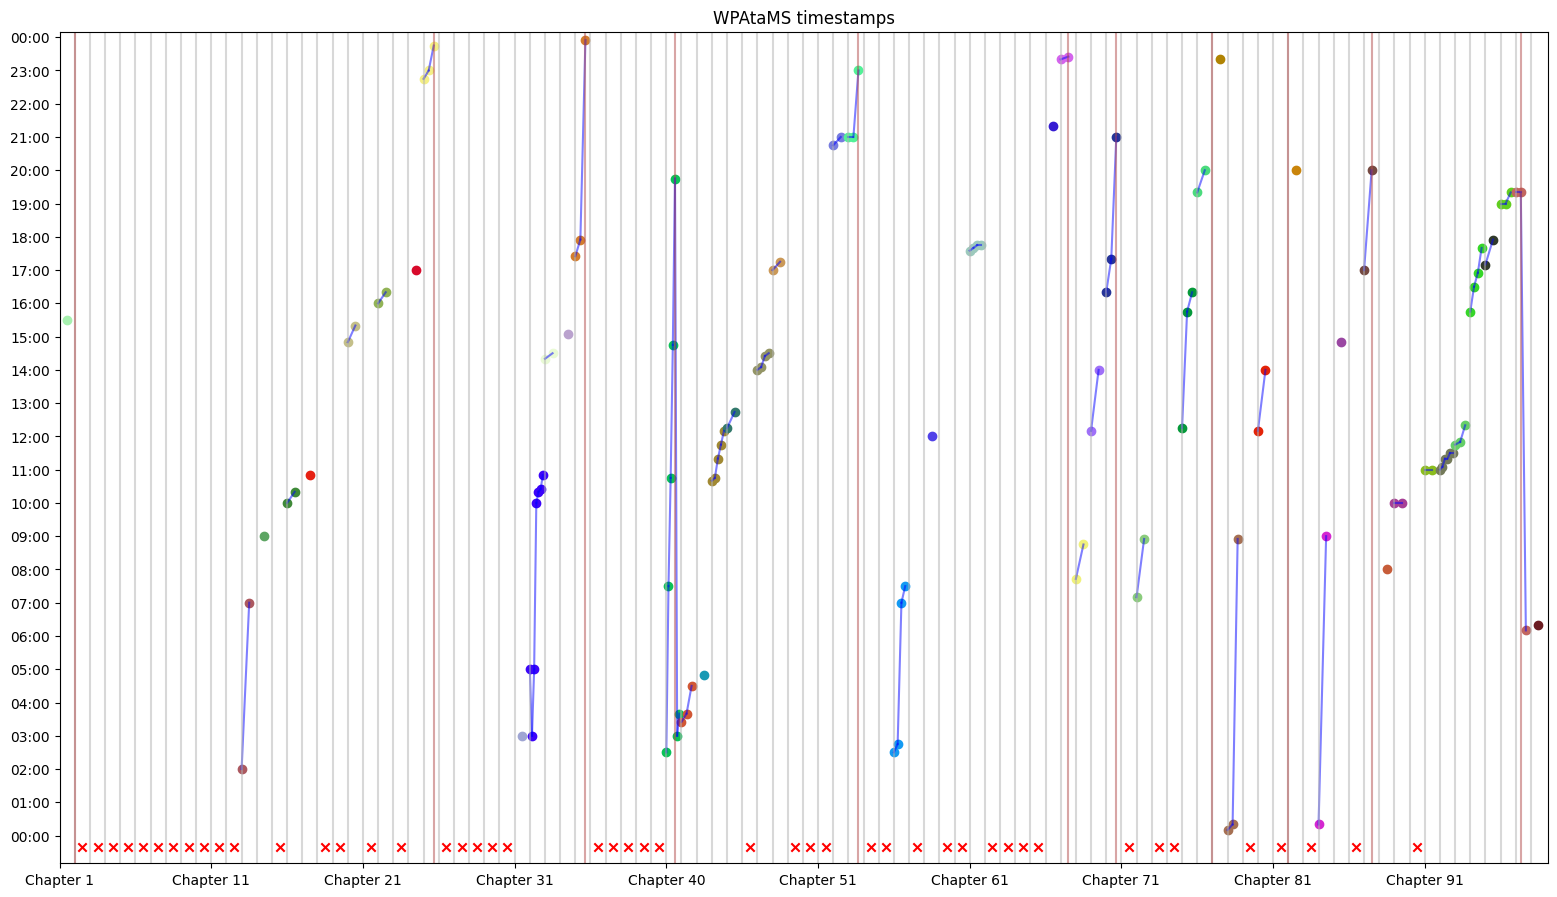

(None,
 11,
 [(1, 11.020408163265307),
  (31, 271.83673469387753),
  (41, 382.0408163265306),
  (41, 447.11370262390676),
  (56, 580.4081632653061),
  (68, 732.8571428571429),
  (72, 767.7551020408164),
  (78, 837.5510204081634),
  (84, 892.6530612244899),
  (88, 953.265306122449),
  (97, 1061.6326530612246)])

In [94]:
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from random import random

fig = plt.figure(figsize=(19.2,10.8))
ax = fig.add_subplot(111)

fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi

unit = size[1].item()/len(timestamps)
halfUnit = unit/2

datechanges = []

previousTimestamp = 24*60
previousPosition = unit



for chapterNumber,chapter in enumerate(timestamps):

    xStart = unit*chapterNumber
    xEnd = xStart+unit
    color = (random(),random(),random())

    if len(chapter) == 0:
        # print(chapterNumber)
        plt.scatter(xStart+halfUnit,-20,marker='x',color='red')
    elif len(chapter) == 1:
        plt.scatter(xStart+halfUnit,chapter[0],color=color)
    else:
        interUnit = unit/len(chapter)
        for timestampNumer,timestamp in enumerate(chapter):
            plt.scatter(xStart+(interUnit*timestampNumer),timestamp,color=color)

            # Line between timestamps in a chapter with more than 1 tmestamp
            # Well first if last chapter, do not draw a line
            if timestampNumer+1 != len(chapter):
                xPoses = [xStart+(interUnit*timestampNumer),xStart+(interUnit*(timestampNumer+1))]
                yPoses = [timestamp,chapter[timestampNumer+1]]
                plt.plot(xPoses, yPoses, c=(0,0,1,0.5))
            
for chapterNumber,chapter in enumerate(timestamps):
    xStart = unit*chapterNumber
    xEnd = xStart+unit
    plt.axvline(xStart,color=(0.7,0.7,0.7,0.5))


for chapterNumber,chapter in enumerate(timestamps):
    xStart = unit*chapterNumber
    xEnd = xStart+unit

    # Because if the chapter does not chnage the time, it won't change the date
    if len(chapter) == 0:
        continue
    
    interUnit = unit/len(chapter)

    for timestampNumer,timestamp in enumerate(chapter):
        if previousTimestamp - timestamp > 120 and previousPosition != 0:
            datechanges.append((chapterNumber+1,previousPosition))
        previousTimestamp = timestamp
        previousPosition = xStart + (interUnit * timestampNumer)


for datechange in datechanges:
    plt.axvline(datechange[1],color=(0.7,0.3,0.3,0.5))
    pass


def minutes_to_hhmm(x,pos=0):
    x = x%(24*60)
    hours = int(x // 60)
    minutes = int(x % 60)
    return f'{hours:02d}:{minutes:02d}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(minutes_to_hhmm))
ax.yaxis.set_major_locator(ticker.MultipleLocator(60))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'Chapter {int(x/unit)+1}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(unit*10))

plt.ylim(-50,60*24+10)
plt.xlim(left=0,right=unit*len(timestamps)+(unit/10))      

plt.title("WPAtaMS timestamps")

plt.show(),len(datechanges),datechanges

### I have checked the above plot, and made this table

| day number | chapters |                                                                                                        description |
| :--------- | :------: | -----------------------------------------------------------------------------------------------------------------: |
| 1          |   1-12   |                                                                                            arrival and orientation |
| 2          |  13-31   |                                                 it ends at the weapon inspection, has the null fight and library 1 |
| 3          |  31-35   | food 1, grapple, aprentice, and jumping into the portal (note 35 does end exactly at midnight, which matches ch41) |
| 4          |  35-41   |     portal shenedigangs, bomb, etc (note ch41 has the whole, and is the only one thaat has timestamps for the day) |
| 5          |  41-55   |                                                               emma returns, letter, assembly, library 2, library 3 |
| 6          |  56-67   |                                                                                                      movie night 1 |
| 7          |  68-71   |                                                               Professor Vanavan's class, killing birds with Ilunor |
| 8          |  72-77   |                                                        Professor Articord's class, Assasination attempt at Thalmin |
| 9          |  78-84   |                                                 Larial Essen's / Sorecar's class, Mixer, Names of the burned books |
| 10         |  84-87   |                                                                           Professor Belnor's class, Dean Tea Party |
| 11         |  88-97   | Professor Chiska's class, first library checkup, planing for the trip, the cosmos (and Post Scarcity) discussion I |
| 12         |   97-    |                                                                                                    Trip to Elaseer |



## Analysis
Now that we have made **THE PLOT™** and **THE TABLE™**, we can go to the main course, the analysis of the chapter when the comunication deadline *(5 weeks)* ends.

We will use a few aproaches, but we will start with the simplest one ... just assume a constant speed, calculate the slope, and see where it crosses the 5 week line. 

In [33]:
fullDays = len(datechanges)-1 #it just works out this way, don't ask

firstDayOfset = 24*60 - timestamps[0][0] # this works out to 8 and a half hours

lastDayOfset = previousTimestamp # this is a bit harder, we do not know if the last chapter has a time .... but prevTimestamp has it, also conviniently this is in *"minutes after midnight"*

totalMinutesInBook = firstDayOfset+lastDayOfset+(fullDays*24*60)

# to check i asked wolframAlpha "15280 minutes = 10 days + 8.5 hours + 6 hours + 10 minutes" and it came out as "true"

decimalHoursInBook = totalMinutesInBook/60 # this is decimal hours
decimalDaysInBook = decimalHoursInBook/24 # this is decimal days

decimalDaysInBook,decimalHoursInBook,totalMinutesInBook

(10.618055555555555, 254.83333333333334, 15290)

In [34]:
daysInBook = decimalDaysInBook // 1
hoursInBook = (decimalHoursInBook - 24*daysInBook) // 1
minutesInBook = totalMinutesInBook - 60*24*daysInBook - 60*hoursInBook

currentTime = f"Day {daysInBook:.0f}, {hoursInBook:.0f}:{minutesInBook:.0f}"

currentTime

'Day 10, 14:50'

In [35]:
# Let's do a simple 2 point analysis of the timeframe to get the 5 week deadline's chapter


"""
current chapter number - decimalDaysInBook
            x          - 35 or 36
"""

# Assuming 35 days translates to a specific number of minutes:
day35Beginning = ((len(timestamps) + 1) * (35 * 24 * 60)) / totalMinutesInBook
day35T1530 = ((len(timestamps) + 1) * (((35 * 24 * 60) + (15 * 60) + 30))) / totalMinutesInBook  # 35 days + 15:30 (in minutes)
day35End = ((len(timestamps) + 1) * (((35 * 24 * 60) + (23 * 60) + 59))) / totalMinutesInBook  # End of 35th day (23:59)


print("# Time analysis:")
if len(timestamps[-1]) == 0:
    print("This chapter either does not appear to have any timestamps, the estimates will not be updated")
    print("It is equally probable that KekKom messsed up and the code AGAIN.")
    print("")
    print(f"The analysis below, will be using the data from: Chapter {next(i for i in reversed(range(len(timestamps))) if timestamps[i])+1}")
else:
    print("This chapter has a timestamp, so the estimates will be updated")

print("\n\n")
print("## Date and time")
print(currentTime)

print("\n\n")
print('## In which chapter will the "Communication deadline" pass')
print("The deadline is 5 weeks after arival, so there are three pssibilities:")
print(f"* If the deadline is at the beggining of day 35, then it would happen in chapter : {round(day35Beginning)}")
print(f"* If the deadline is exactly 35 days after (ie. 15:30 on day 35), then it would happen in chapter : {round(day35T1530)}")
print(f"* If the deadline is at the end of day 35, then it would happen in chapter : {round(day35End)}")

# Time analysis:
This chapter has a timestamp, so the estimates will be updated



## Date and time
Day 10, 14:50



## In which chapter will the "Communication deadline" pass
The deadline is 5 weeks after arival, so there are three pssibilities:
* If the deadline is at the beggining of day 35, then it would happen in chapter : 326
* If the deadline is exactly 35 days after (ie. 15:30 on day 35), then it would happen in chapter : 332
* If the deadline is at the end of day 35, then it would happen in chapter : 336


## A better analysis
First let's plot the slope between chapters. I guess there are a few ways to calculate the slope between some two chapters, but first lets make the data into a better format. Let's add `24*60` to the timestamp on every datechange

In [89]:
timestampAtEndOfChapter = []
gg = []

for j in range(2,len(timestamps)):
    smallTimestamps = timestamps[:j]
    a = smallTimestamps[next(i for i in reversed(range(len(smallTimestamps))) if smallTimestamps[i])]
    
    timestampAtEndOfChapter.append(a[-1])

day = 0


for i,timestamp in enumerate(timestampAtEndOfChapter):
    if i == 0:
        continue
    # print(timestampAtEndOfChapter[i-1])
    if timestamp - timestampAtEndOfChapter[i-1] < -120:
        # print(i+2)
        day = day + 1

    gg.append(timestampAtEndOfChapter[i] + (day * 24 * 60))


gg[-5:]

[13700, 14020, 14035, 14120, 14770]

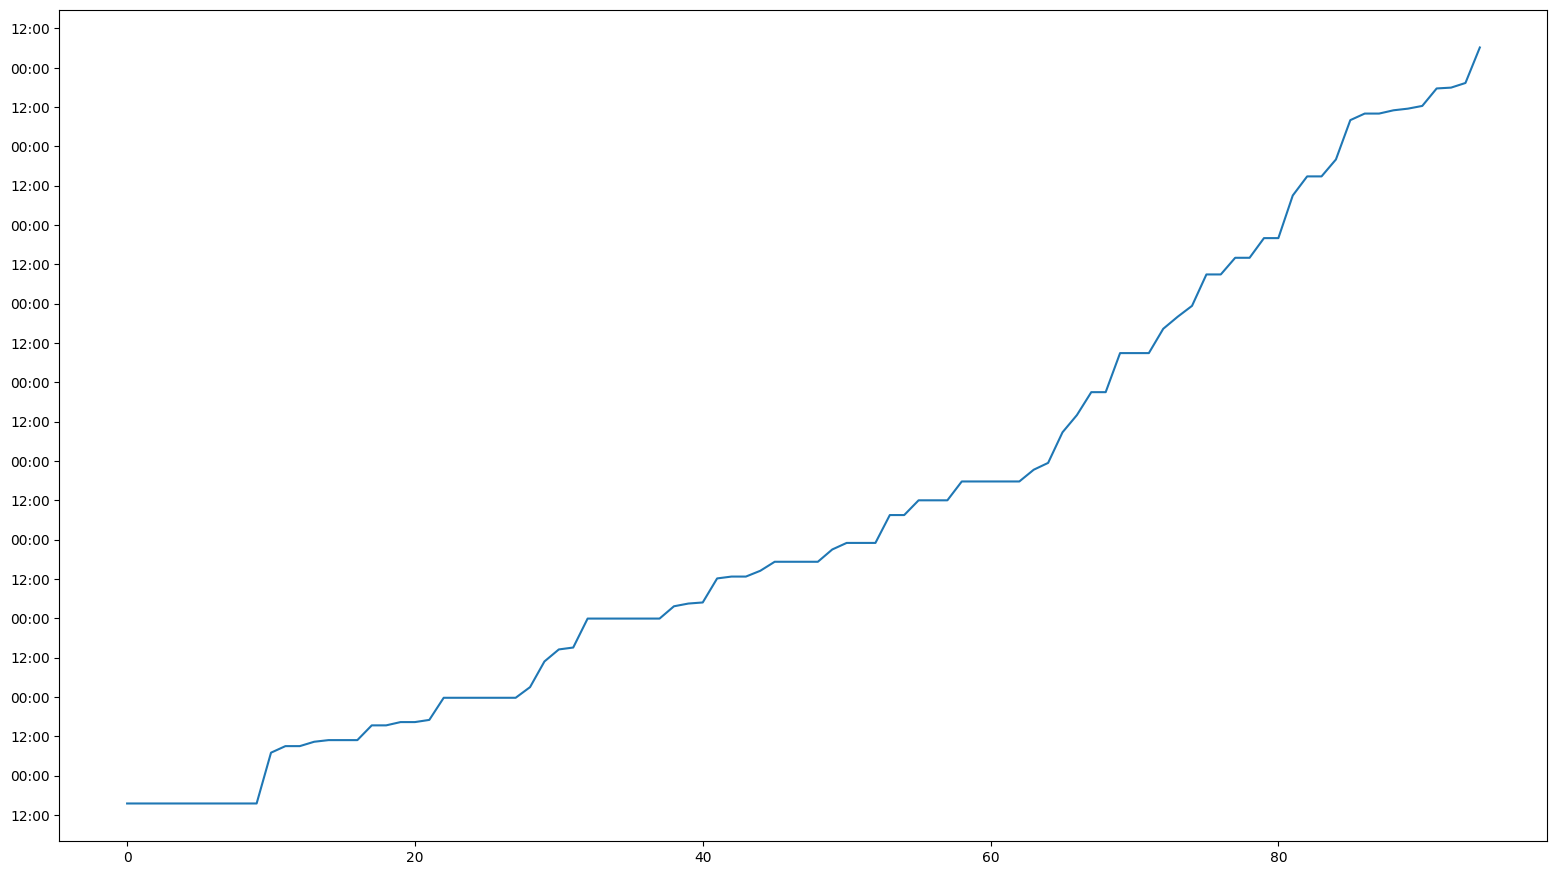

In [95]:
fig = plt.figure(figsize=(19.2,10.8))
ax = fig.add_subplot(111)


ax.yaxis.set_major_formatter(ticker.FuncFormatter(minutes_to_hhmm))
ax.yaxis.set_major_locator(ticker.MultipleLocator(60*12))

plt.plot(gg)
